# Data Cleaning and Preprocessing

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('eq2015.csv')

In [3]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed,superstructure
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair,has_superstructure_mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair,has_superstructure_mud_mortar_stone


In [4]:
#increasing column limit since head() does not reveal all columns.
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed,superstructure
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair,has_superstructure_mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair,has_superstructure_mud_mortar_stone


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   building_id                  762106 non-null  int64 
 1   district_id                  762106 non-null  int64 
 2   vdcmun_id                    762106 non-null  int64 
 3   ward_id                      762106 non-null  int64 
 4   count_floors_pre_eq          762106 non-null  int64 
 5   count_floors_post_eq         762106 non-null  int64 
 6   age_building                 762106 non-null  int64 
 7   plinth_area_sq_ft            762106 non-null  int64 
 8   height_ft_pre_eq             762106 non-null  int64 
 9   height_ft_post_eq            762106 non-null  int64 
 10  land_surface_condition       762106 non-null  object
 11  foundation_type              762106 non-null  object
 12  roof_type                    762106 non-null  object
 13  ground_floor_t

In [7]:
df = df.drop(columns=['building_id', 'vdcmun_id', 'ward_id', 'other_floor_type', 'position', 'condition_post_eq', 'plinth_area_sq_ft'])
for column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    if (missing_count > 0):
        print(f"In '{column_name}' there are {missing_count} missing values")

In 'plan_configuration' there are 1 missing values
In 'damage_grade' there are 12 missing values
In 'technical_solution_proposed' there are 12 missing values


In [8]:
#imputing missing values with the mode (all are categorical)
#for loop iterates through each column and fill if missing
for column_name in df.columns:
    column_mode = df[column_name].mode()[0]
    df[column_name].fillna(column_mode, inplace=True)
#double checking to make sure there are no remaining missing values in each column 
for column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    if (missing_count > 0):
        print(f"In '{column_name}' there are {missing_count} missing values")
    else: 
        print(f"No missing values in '{column_name}'")

No missing values in 'district_id'
No missing values in 'count_floors_pre_eq'
No missing values in 'count_floors_post_eq'
No missing values in 'age_building'
No missing values in 'height_ft_pre_eq'
No missing values in 'height_ft_post_eq'
No missing values in 'land_surface_condition'
No missing values in 'foundation_type'
No missing values in 'roof_type'
No missing values in 'ground_floor_type'
No missing values in 'plan_configuration'
No missing values in 'damage_grade'
No missing values in 'technical_solution_proposed'
No missing values in 'superstructure'


In [9]:
#creating two new columns that show the height and floors lost from earthquake
df['eq_floor_difference'] = df['count_floors_pre_eq'] - df['count_floors_post_eq']
df['eq_height_difference'] = df['height_ft_pre_eq'] - df['height_ft_post_eq']

In [10]:
df.describe()

,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq,eq_floor_difference,eq_height_difference
count,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,25.767835,2.087783,1.252058,24.326405,16.049372,9.868817,0.835725,6.180555
std,5.807555,0.655101,1.063275,65.043704,5.493878,8.574169,1.091791,8.266922
min,12.000000,1.000000,0.000000,0.000000,6.000000,0.000000,-8.000000,-80.000000
25%,22.000000,2.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,1.000000,16.000000,16.000000,11.000000,0.000000,0.000000
75%,30.000000,2.000000,2.000000,27.000000,18.000000,16.000000,2.000000,14.000000
max,36.000000,9.000000,9.000000,999.000000,99.000000,99.000000,9.000000,99.000000


In [11]:
#removing errorneous rows from the data set 
neg_removal = df[(df['eq_height_difference'] < 0) | (df['eq_floor_difference'] < 0)].index
df.drop(neg_removal, inplace = True)

In [12]:
df.describe()

,district_id,count_floors_pre_eq,count_floors_post_eq,age_building,height_ft_pre_eq,height_ft_post_eq,eq_floor_difference,eq_height_difference
count,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000,759428.000000
mean,25.768474,2.088588,1.248116,24.346989,16.054373,9.835491,0.840472,6.218882
std,5.804610,0.655029,1.061035,65.111244,5.493835,8.553799,1.088990,8.243755
min,12.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,1.000000,16.000000,16.000000,11.000000,0.000000,0.000000
75%,30.000000,2.000000,2.000000,27.000000,18.000000,16.000000,2.000000,14.000000
max,36.000000,9.000000,9.000000,999.000000,99.000000,99.000000,9.000000,99.000000


In [13]:
#checking out the updated shape of dataset.
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns currently in the dataset')

There are 759428 rows and 16 columns currently in the dataset


# Exploratory Data Analysis

1. What is the distribution of building ages in the dataset?

C:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\typjo\anaconda3\envs\DS160\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


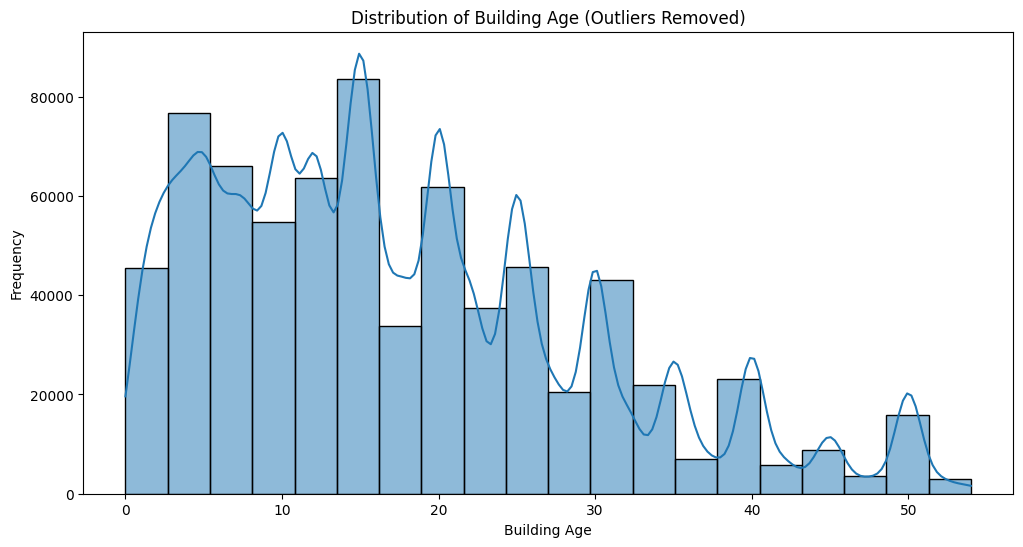

In [18]:
#finding outlier to filter out outliers in the age of buildings
Q1 = df['age_building'].quantile(0.25)
Q3 = df['age_building'].quantile(0.75)
IQR = Q3 - Q1

#using the IQR to filter out outliers from dataset and displaying it using a histogram
filtered_df = df[(df['age_building'] >= (Q1 - 1.5 * IQR)) & (df['age_building'] <= (Q3 + 1.5 * IQR))]
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['age_building'], kde=True, bins = 20)
plt.title('Distribution of Building Age (Outliers Removed)')
plt.xlabel('Building Age')
plt.ylabel('Frequency')
plt.show()

2. How many buildings are in each district and how many were destroyed?

In [20]:
#mapping the techical solution proposed to a binary outcome to help with visuals and modeling
#outcome 1 = destroyed, outcome 0 = withstood
df['outcome'] = df['technical_solution_proposed'].map({
    'Reconstruction': 1,
    'Major repair': 1,
    'Minor repair': 0,
    'No need': 0
})

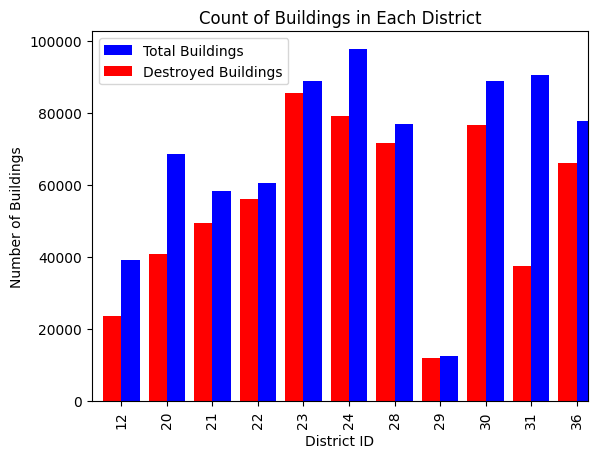

In [28]:
#grouping the buildings by district and getting the values for total count and count destroyed
grouped = df.groupby('district_id')['outcome'].agg(['count', 'sum'])
grouped.columns = ['total_buildings', 'destroyed_buildings']

#graphing the buildings in a bar chart
grouped['total_buildings'].plot(kind='bar', color='blue', position=0, width=0.4, label='Total Buildings')
grouped['destroyed_buildings'].plot(kind='bar', color='red', position=1, width=0.4, label='Destroyed Buildings')

plt.xlabel('District ID')
plt.ylabel('Number of Buildings')
plt.title('Count of Buildings in Each District')
plt.legend()
plt.show()

3. What is the proportion of damage grades following the earthquake?

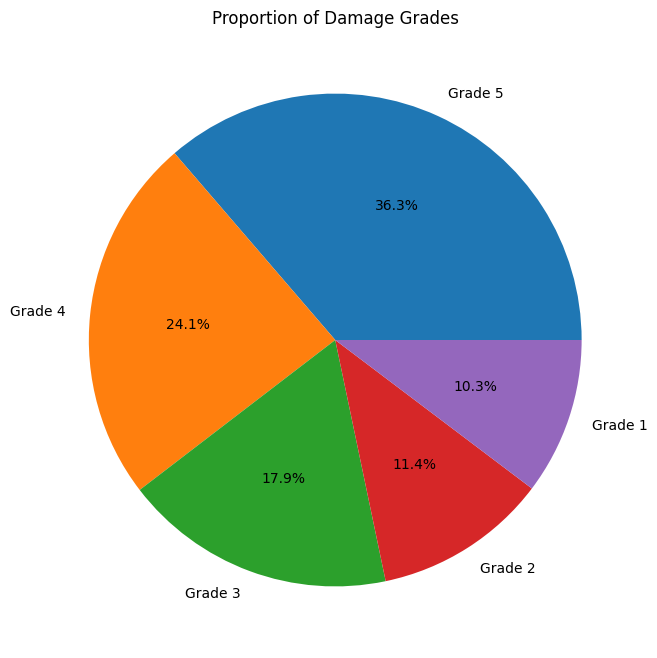

In [32]:
#assigning the value counts of each damage grade to a variable
damage_counts = df['damage_grade'].value_counts()

#plotting the proportions in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Damage Grades')
plt.show()

4. From buildings that only received minor or no damage from the earthquake, what materials were their superstructure and foundation? As well for the buildings that were major damaged or needed reconstruction.

In [37]:
grouped = df.groupby('superstructure')['outcome'].agg(['count', 'sum'])
grouped.columns = ['withstood_structure', 'destroyed_structure']

grouped['total_buildings'].plot(kind='bar', color='blue', position=0, width=0.4, label='Total Buildings')
grouped['destroyed_buildings'].plot(kind='bar', color='red', position=1, width=0.4, label='Destroyed Buildings')

plt.xlabel('Superstructure')
plt.ylabel('Number of Buildings')
plt.title('Superstructures')
plt.legend()
plt.show()

KeyError: 'total_buildings'

# Logistic Regression 

In [39]:
#Creating a new dataframe specifically for the logistic regression model to help predict

#using building and land characteristics
df_model = pd.get_dummies(df[['age_building', 'count_floors_pre_eq', 'land_surface_condition',
             'foundation_type', 'roof_type', 'ground_floor_type', 'plan_configuration', 'superstructure']],
                drop_first=True).astype(int)

In [40]:
df_model['outcome'] = df['outcome']

In [42]:
df_model.head()

,age_building,count_floors_pre_eq,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,superstructure_has_superstructure_bamboo,superstructure_has_superstructure_cement_mortar_brick,superstructure_has_superstructure_cement_mortar_stone,superstructure_has_superstructure_mud_mortar_brick,superstructure_has_superstructure_mud_mortar_stone,superstructure_has_superstructure_other,superstructure_has_superstructure_rc_engineered,superstructure_has_superstructure_rc_non_engineered,superstructure_has_superstructure_stone_flag,superstructure_has_superstructure_timber,outcome
0,9,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,15,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,20,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,20,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,30,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
#assigning columns to X and y for model building
X = df_model.drop('outcome',axis = 1)
y = df_model[['outcome']]

In [45]:
X.head()

,age_building,count_floors_pre_eq,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,superstructure_has_superstructure_bamboo,superstructure_has_superstructure_cement_mortar_brick,superstructure_has_superstructure_cement_mortar_stone,superstructure_has_superstructure_mud_mortar_brick,superstructure_has_superstructure_mud_mortar_stone,superstructure_has_superstructure_other,superstructure_has_superstructure_rc_engineered,superstructure_has_superstructure_rc_non_engineered,superstructure_has_superstructure_stone_flag,superstructure_has_superstructure_timber
0,9,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,15,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,20,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,20,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,30,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [46]:
y.head()

,outcome
0,1
1,1
2,0
3,0
4,0


### Experiment One: Test Size 33%

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .33,
                                                   random_state = 0)

In [26]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [27]:
y_pred = classifier.predict(X_test.values)

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(cm)

NameError: name 'y_pred' is not defined

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59     53374
           1       0.87      0.96      0.91    197238

    accuracy                           0.86    250612
   macro avg       0.81      0.72      0.75    250612
weighted avg       0.85      0.86      0.84    250612



### Experiment Two: Test Size 25%

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                   test_size = .25,
                                                   random_state = 0)

In [40]:
classifier2=LogisticRegression(max_iter=1000)
classifier2.fit(X_train2.values,y_train2.values.ravel())

LogisticRegression(max_iter=1000)

In [41]:
y_pred2 = classifier2.predict(X_test2.values)

In [54]:
cm2 = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()
print(cm2)

NameError: name 'confusion_matrix' is not defined

In [43]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59     40437
           1       0.87      0.96      0.91    149420

    accuracy                           0.86    189857
   macro avg       0.81      0.72      0.75    189857
weighted avg       0.85      0.86      0.84    189857



### Experiment Three: Test Size 10%

In [49]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y,
                                                   test_size = .001,
                                                   random_state = 0)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier3=LogisticRegression(max_iter=1000)
classifier3.fit(X_train3.values,y_train3.values.ravel())

LogisticRegression(max_iter=1000)

In [53]:
y_pred3 = classifier3.predict(X_test3.values)

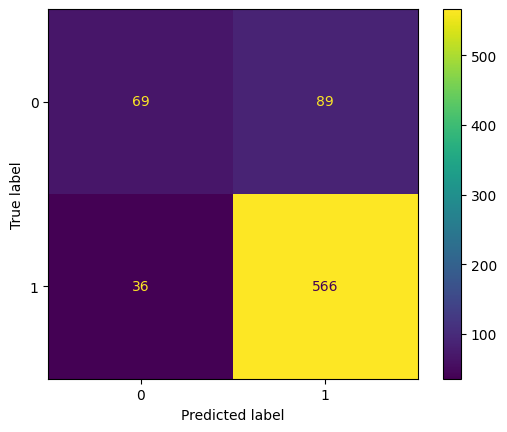

[[ 69  89]
 [ 36 566]]


In [56]:

cm3 = confusion_matrix(y_test3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.show()
print(cm3)

In [57]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.44      0.52       158
           1       0.86      0.94      0.90       602

    accuracy                           0.84       760
   macro avg       0.76      0.69      0.71       760
weighted avg       0.82      0.84      0.82       760



In [49]:
#Generating three random samples to predict
df_model.sample(3)

,age_building,count_floors_pre_eq,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,superstructure_has_superstructure_bamboo,superstructure_has_superstructure_cement_mortar_brick,superstructure_has_superstructure_cement_mortar_stone,superstructure_has_superstructure_mud_mortar_brick,superstructure_has_superstructure_mud_mortar_stone,superstructure_has_superstructure_other,superstructure_has_superstructure_rc_engineered,superstructure_has_superstructure_rc_non_engineered,superstructure_has_superstructure_stone_flag,superstructure_has_superstructure_timber,outcome
575857,5,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
515172,14,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
215360,2,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### Prediction 1: 
building age: 
floors before earthquake: 2
land surface condition: 
foundation type: 
roof_type: 



In [52]:
print(classifier.predict([[5,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0]]))
#successful prediction

[1]
